In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [48]:
df = pd.read_csv("C:\\Users\\jalpa\\Downloads\\titanic_toy.csv")

In [49]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [51]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [52]:
df['Fare'].value_counts()

Fare
8.0500     42
13.0000    39
7.8958     36
7.7500     34
26.0000    27
           ..
12.6500     1
8.6542      1
12.0000     1
7.7292      1
10.5167     1
Name: count, Length: 242, dtype: int64

In [53]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [55]:
x_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Family'}>, <Axes: >]], dtype=object)

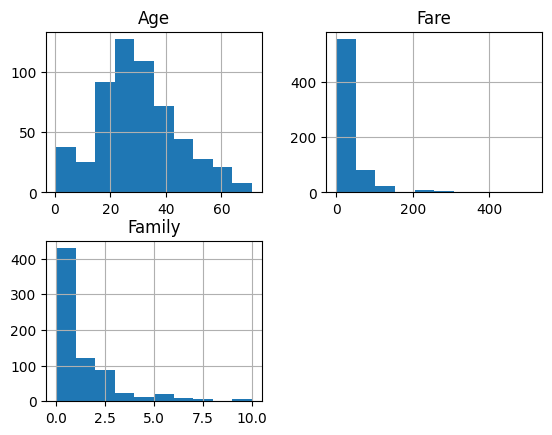

In [56]:
x_train.hist()

In [57]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [58]:
x_train['age_mean'] = x_train['Age'].fillna(mean_age)
x_train['age_median'] = x_train['Age'].fillna(median_age)

x_train['fare_mean'] = x_train['Fare'].fillna(mean_fare)
x_train['fare_median'] = x_train['Fare'].fillna(median_fare)

In [59]:
x_train.head()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458


In [60]:
print('Original: ', x_train['Age'].var())
print('after mean imputation for age: ', x_train['age_mean'].var())
print('after median imputation for age: ', x_train['age_median'].var())

print('Original: ', x_train['Fare'].var())
print('after mean imputation for fare: ', x_train['fare_mean'].var())
print('after mean imputation for fare: ', x_train['fare_median'].var())

Original:  204.34951339046142
after mean imputation for age:  161.81262452718676
after median imputation for age:  161.98956633460548
Original:  2448.1979137063163
after mean imputation for fare:  2324.2385256705534
after mean imputation for fare:  2340.09102197536


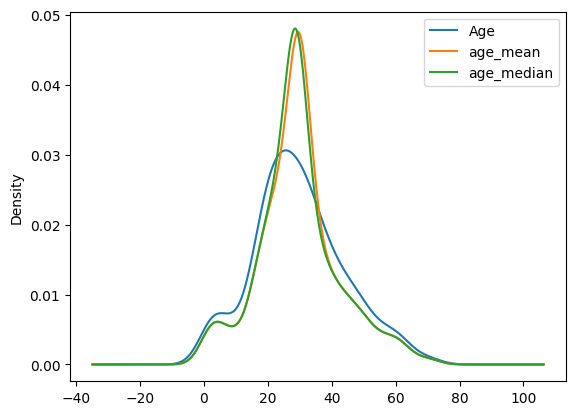

In [61]:
#Plot the figures
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind = 'kde', ax = ax)

x_train['age_mean'].plot(kind = 'kde', ax = ax)

x_train['age_median'].plot(kind = 'kde', ax = ax)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels , loc = 'best')

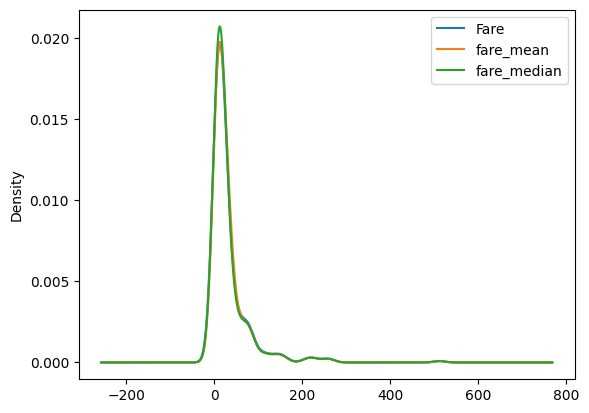

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Fare'].plot(kind = 'kde', ax = ax)

x_train['fare_mean'].plot(kind = 'kde', ax = ax)

x_train['fare_median'].plot(kind = 'kde', ax = ax)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [65]:
x_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [66]:
x_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

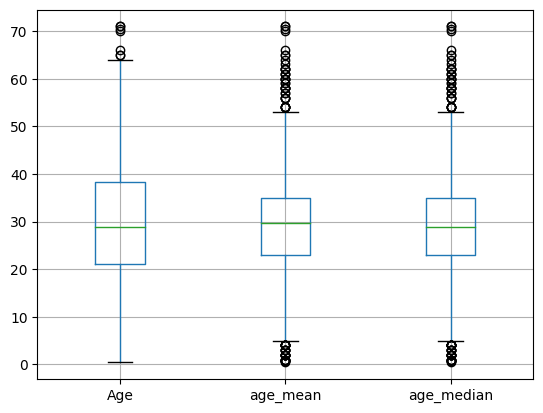

In [68]:
x_train[['Age', 'age_mean', 'age_median']].boxplot()

<Axes: >

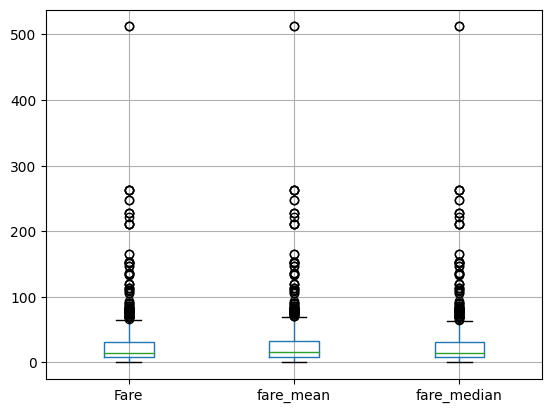

In [71]:
x_train[['Fare', 'fare_mean', 'fare_median']].boxplot()

# Using Sklearn

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [73]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [74]:
imputer1

SimpleImputer(strategy='median')

In [75]:
imputer2

SimpleImputer()

In [76]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder = 'passthrough')

In [77]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [78]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [79]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [80]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [81]:
x_test

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 28.75      ,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  32.61759689,   1.        ],
       [ 65.        ,   7.75   